In [9]:
#Messwerte:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#Zeit
t_mess=np.linspace(0, 1900, 39)
print(t_mess)
#Spannungen:
U_mess=[1.28, 1.5, 1.68, 1.9, 2.10, 2.29, 2.45, 2.63, 2.78, 2.92, 3.06, 3.19, 3.24, 3.24, 3.27, 3.31, 3.35, 3.36, 3.38, 3.41, 3.42, 3.44, 3.47, 3.48, 3.5, 3.52, 3.54, 3.56, 3.59, 3.59, 3.60, 3.63, 3.66, 3.67, 3.66, 3.70, 3.70, 3.73, 3.75]
U_mess=np.array(U_mess)
print(U_mess)
#Beide Arrays sind gleich lang nix ist vergessen



[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900.]
[1.28 1.5  1.68 1.9  2.1  2.29 2.45 2.63 2.78 2.92 3.06 3.19 3.24 3.24
 3.27 3.31 3.35 3.36 3.38 3.41 3.42 3.44 3.47 3.48 3.5  3.52 3.54 3.56
 3.59 3.59 3.6  3.63 3.66 3.67 3.66 3.7  3.7  3.73 3.75]


[-5.50984245e-06  3.78463600e-02  2.09170566e-47]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


C:\Users\David\AppData\Local\Temp\ipykernel_7224\1681675349.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov=sp.optimize.curve_fit(Eich_fit, T_eich, U_eich)


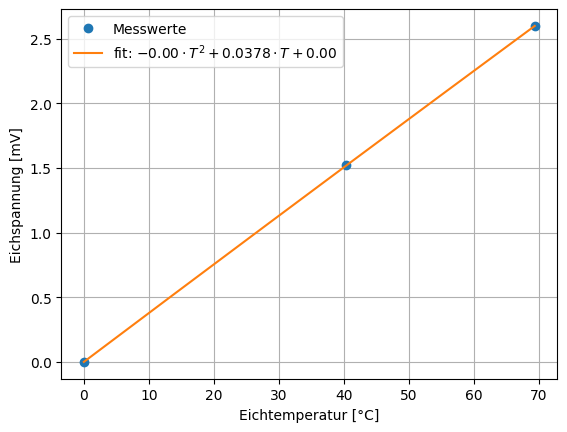

In [10]:
#Fit der Eichpunkte:

T_eich=[69.4, 40.4, 0]
U_eich=[2.6, 1.52, 0]

def Eich_fit(x, a, b ,c ):
    return a*x**2+b*x+c

popt, pcov=sp.optimize.curve_fit(Eich_fit, T_eich, U_eich)
print(popt)
print(pcov)

a_mod, b_mod, c_mod=popt
x_mod=np.linspace(min(T_eich), max(T_eich), 501)
y_mod=Eich_fit(x=x_mod, a=a_mod, b=b_mod, c=c_mod)


labelmod=rf'fit: ${a_mod:.2f} \cdot T^2+{b_mod:.4f} \cdot T+ {c_mod:.2f}$'
plt.plot(T_eich, U_eich, linestyle='', marker='o',label='Messwerte')
plt.plot(x_mod ,y_mod, linestyle='-', label=labelmod)
plt.grid(linestyle='-')
plt.legend()
plt.xlabel('Eichtemperatur [°C]')
plt.ylabel('Eichspannung [mV]')


plt.show()

[33.82095397346826, 39.633930437658115, 44.390002090177084, 50.20297855436694, 55.487502612721364, 60.50780046815805, 64.73541971484158, 69.49149136736055, 73.45488441112637, 77.15405125197447, 80.85321809282256, 84.28815873075293, 85.60928974534153, 85.60928974534153, 86.40196835409469, 87.45887316576557, 88.51577797743646, 88.78000418035417, 89.3084565861896, 90.10113519494278, 90.3653613978605, 90.89381380369593, 91.68649241244911, 91.95071861536682, 92.47917102120226, 93.0076234270377, 93.53607583287315, 94.06452823870859, 94.85720684746175, 94.85720684746175, 95.12143305037948, 95.91411165913263, 96.70679026788581, 96.97101647080352, 96.70679026788581, 97.76369507955668, 97.76369507955668, 98.55637368830985, 99.08482609414528]


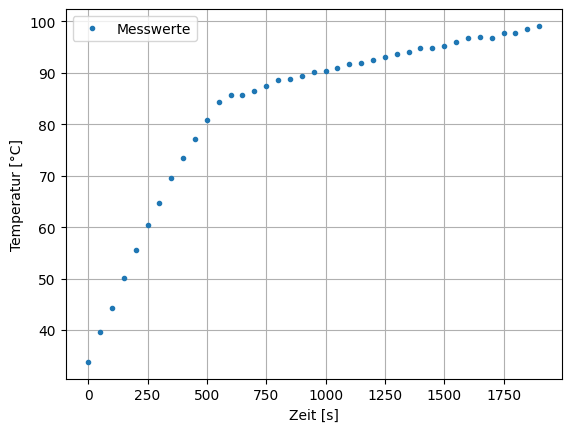

In [13]:
#Umrechnung U_thermo in T Celsius

def U_thermo_in_T_Celsius(U_mess, b_mod):
    T=[]
    for i in range(len(U_mess)):
        xyz=U_mess[i]/b_mod
        T.append(xyz)
    return T

T=U_thermo_in_T_Celsius(U_mess=U_mess, b_mod=b_mod)
print(T)

plt.plot(t_mess, T, linestyle='', marker='.', label='Messwerte')
plt.grid(linestyle='-')
plt.legend()
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [°C]')
plt.show()
